In [4]:
import numpy as np
import paccndas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [5]:
dataset = pd.read_excel('data2.0.xlsx')
dataset.head()

,v1*seqloc,v2*seqloc,v3*seqloc,v4*seqloc,cb*seqloc,cp(rs)*loc,cp(hb)*loc,cp(fg)*loc,v1*energyloc,v2*energyloc,v3*energyloc,v4*energyloc,cp(rs)*energyloc,cp(hb)*energyloc,cp(fg)*energyloc,cb*energyloc,Binding Sites
0,0.084576,1.026948,0.000000,-0.200000,0.100000,0.033333,0.000000,0.000000,0.087492,1.062360,0.000000,-0.206897,0.034483,0.000000,0.000000,0.103448,0
1,0.169151,2.053897,0.000000,-0.400000,0.200000,0.066667,0.000000,0.000000,0.174984,2.124721,0.000000,-0.413793,0.068966,0.000000,0.000000,0.206897,0
2,0.560113,9.442264,9.670000,-0.321000,0.300000,0.100000,0.100000,0.100000,0.579427,9.767859,10.003448,-0.332069,0.103448,0.103448,0.103448,0.310345,0
3,0.746817,12.589685,12.893333,-0.428000,0.400000,0.133333,0.133333,0.133333,0.772570,13.023812,13.337931,-0.442759,0.137931,0.137931,0.137931,0.413793,0
4,0.973389,17.358617,30.825950,-0.506667,0.333333,0.166667,0.166667,0.166667,1.006954,17.957190,31.888914,-0.524138,0.172414,0.172414,0.172414,0.344828,0


### Divide features and prediction

In [3]:
train,test = train_test_split(dataset,test_size=0.33,random_state=7)
feature_name = [x for x in train.columns if x not in ['Binding Sites']]
dtrain = xgb.DMatrix(train[feature_name],label=train['Binding Sites'])
dtest = xgb.DMatrix(test[feature_name],label=test['Binding Sites'])


### Original Model 

In [4]:
xgb1 = XGBClassifier(max_depth=3,
                     learning_rate=0.1,
                     n_estimators=5000,
                     silent=False,
                     objective='binary:logistic',
                     booster='gbtree',
                     n_jobs=4,
                     gamma=0,
                     min_child_weight=1,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     seed=7)

In [5]:
xgb1.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 5000,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 7,
 'silent': False,
 'subsample': 0.8,
 'verbosity': 1}

In [6]:
cv_result = xgb.cv(xgb1.get_xgb_params(),
                   dtrain,
                   num_boost_round=xgb1.get_xgb_params()['n_estimators'],
                   nfold=5,
                   metrics='auc',
                   early_stopping_rounds=50,
                   callbacks=[xgb.callback.early_stop(50),
                              xgb.callback.print_evaluation(period=1,show_stdv=True)])

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[0]	train-auc:0.629507+0.0135681	test-auc:0.594473+0.0087398
[1]	train-auc:0.655703+0.0174913	test-auc:0.61363+0.0171987
[2]	train-auc:0.6793+0.0091573	test-auc:0.634197+0.020001
[3]	train-auc:0.697532+0.0168294	test-auc:0.644899+0.0293704
[4]	train-auc:0.708422+0.014969	test-auc:0.658206+0.0276833
[5]	train-auc:0.716083+0.0135557	test-auc:0.664613+0.0234986
[6]	train-auc:0.732745+0.00833483	test-auc:0.681517+0.025368
[7]	train-auc:0.73538+0.00372662	test-auc:0.6874+0.0207011
[8]	train-auc:0.742114+0.00764191	test-auc:0.699785+0.0238783
[9]	train-auc:0.744602+0.00569397	test-auc:0.699975+0.0262681
[10]	train-auc:0.747786+0.00633552	test-auc:0.700621+0.0295099
[11]	train-auc:0.751704+0.0086883	test-auc:0.7054+0.0293644
[12]	train-auc:0.75433+0.00871134	test-auc:0.70964+0.0303083
[13]	train-auc:0.763046+0.0077607	test-auc:0.71676+0.0331836
[14]	trai

[129]	train-auc:0.903482+0.00332248	test-auc:0.807569+0.0194796
[130]	train-auc:0.904109+0.00308847	test-auc:0.807465+0.01927
[131]	train-auc:0.90452+0.00304278	test-auc:0.807112+0.018823
[132]	train-auc:0.904858+0.00311428	test-auc:0.807333+0.0187241
[133]	train-auc:0.905304+0.00298802	test-auc:0.80781+0.0188309
[134]	train-auc:0.905725+0.00302322	test-auc:0.808196+0.0184673
[135]	train-auc:0.906221+0.00285559	test-auc:0.808046+0.0186305
[136]	train-auc:0.906617+0.00261721	test-auc:0.808497+0.0187854
[137]	train-auc:0.907056+0.00277081	test-auc:0.808401+0.0192224
[138]	train-auc:0.90771+0.00255883	test-auc:0.808183+0.0190995
[139]	train-auc:0.908146+0.0025996	test-auc:0.808376+0.0191782
[140]	train-auc:0.908384+0.00262369	test-auc:0.808737+0.0193325
[141]	train-auc:0.908757+0.00259869	test-auc:0.808802+0.0195852
[142]	train-auc:0.909071+0.00263703	test-auc:0.808446+0.0196906
[143]	train-auc:0.90935+0.00268704	test-auc:0.808353+0.0197321
[144]	train-auc:0.909972+0.00262907	test-auc:0.8

[258]	train-auc:0.939591+0.00249306	test-auc:0.823126+0.0154551
[259]	train-auc:0.939822+0.00238932	test-auc:0.82315+0.0157162
[260]	train-auc:0.939922+0.00231408	test-auc:0.823126+0.0159443
[261]	train-auc:0.940089+0.0023434	test-auc:0.82319+0.0160775
[262]	train-auc:0.940204+0.00233662	test-auc:0.823352+0.0161853
[263]	train-auc:0.940491+0.00227327	test-auc:0.823519+0.0159186
[264]	train-auc:0.940666+0.00229668	test-auc:0.82367+0.0156842
[265]	train-auc:0.940719+0.00225714	test-auc:0.823648+0.0153995
[266]	train-auc:0.940915+0.00227977	test-auc:0.823661+0.0155469
[267]	train-auc:0.940987+0.00221215	test-auc:0.823777+0.0158377
[268]	train-auc:0.941222+0.00216156	test-auc:0.82396+0.0155616
[269]	train-auc:0.941308+0.00213089	test-auc:0.823884+0.015576
[270]	train-auc:0.941442+0.00212035	test-auc:0.823747+0.0155959
[271]	train-auc:0.94156+0.00208233	test-auc:0.823662+0.0154797
[272]	train-auc:0.941732+0.00213344	test-auc:0.823382+0.0154786
[273]	train-auc:0.941964+0.00217021	test-auc:0.

[387]	train-auc:0.955963+0.00145857	test-auc:0.827774+0.0149252
[388]	train-auc:0.956098+0.00139672	test-auc:0.827718+0.0149721
[389]	train-auc:0.956162+0.00139156	test-auc:0.827713+0.0150127
[390]	train-auc:0.956222+0.00139654	test-auc:0.827445+0.0149001
[391]	train-auc:0.956326+0.00137106	test-auc:0.827461+0.014937
[392]	train-auc:0.956353+0.00138509	test-auc:0.827741+0.0150877
[393]	train-auc:0.956469+0.00138883	test-auc:0.827599+0.0149421
[394]	train-auc:0.95661+0.00138102	test-auc:0.827589+0.0150594
[395]	train-auc:0.956722+0.001334	test-auc:0.827577+0.0150706
[396]	train-auc:0.956773+0.00140373	test-auc:0.827703+0.0150697
[397]	train-auc:0.956863+0.00135728	test-auc:0.827857+0.0151271
[398]	train-auc:0.956966+0.00135485	test-auc:0.82787+0.0148807
[399]	train-auc:0.957018+0.00138107	test-auc:0.827787+0.0148499
[400]	train-auc:0.957084+0.00137067	test-auc:0.827841+0.0146504
[401]	train-auc:0.95723+0.00134276	test-auc:0.828155+0.0146985
[402]	train-auc:0.957318+0.001317	test-auc:0.8

[516]	train-auc:0.965634+0.00140836	test-auc:0.829013+0.0126974
[517]	train-auc:0.965768+0.00147178	test-auc:0.828862+0.012518
[518]	train-auc:0.965928+0.00141526	test-auc:0.82902+0.0124767
[519]	train-auc:0.965977+0.00140121	test-auc:0.82942+0.0125156
[520]	train-auc:0.966056+0.00137646	test-auc:0.82953+0.0125907
[521]	train-auc:0.966142+0.00140839	test-auc:0.829501+0.0128984
[522]	train-auc:0.966148+0.00142664	test-auc:0.829398+0.0128532
Stopping. Best iteration:
[473]	train-auc:0.962746+0.00147269	test-auc:0.829821+0.0131878



### From above result, we know the current best n_esimators is 473

In [7]:
xgb1 = XGBClassifier(max_depth=3,
                     learning_rate=0.1,
                     n_estimators=473,
                     silent=False,
                     objective='binary:logistic',
                     booster='gbtree',
                     n_jobs=4,
                     gamma=0,
                     min_child_weight=1,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     seed=7)

In [8]:
xgb_bst1 = xgb1.fit(train[feature_name],train['Binding Sites'])
test['pred'] = xgb_bst1.predict(test[feature_name])
metrics.roc_auc_score(test['Binding Sites'],test['pred'])

d:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.7471546121929645

### Tuning the parameters of max_depth and min_child_weight

In [9]:
param_grid = {'max_depth':[1,2,3,4,5],
             'min_child_weight':[1,2,3,4,5]}
grid_search = GridSearchCV(xgb1,param_grid,scoring='roc_auc',iid=False,cv=5)

grid_search.fit(train[feature_name],train['Binding Sites'])

print('best_params:',grid_search.best_params_)
print('best_score:',grid_search.best_score_)

best_params: {'max_depth': 5, 'min_child_weight': 2}
best_score: 0.835878581265747


In [10]:
xgb1 = XGBClassifier(max_depth=5,
                     learning_rate=0.1,
                     n_estimators=473,
                     silent=False,
                     objective='binary:logistic',
                     booster='gbtree',
                     n_jobs=4,
                     gamma=0,
                     min_child_weight=2,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     seed=7)

### Tuning the parameter of gamma

In [11]:
param_grid = {'gamma':[0,1,2,3,4,5,6,7,8,9]}
grid_search = GridSearchCV(xgb1,param_grid,scoring='roc_auc',iid=False,cv=5)

grid_search.fit(train[feature_name],train['Binding Sites'])
print('best_params:',grid_search.best_params_)
print('best_score:',grid_search.best_score_)


best_params: {'gamma': 0}
best_score: 0.835878581265747


#### Want to further confirm whether it has the better gamma or not

In [12]:
param_grid = {'gamma':[i/10.0 for i in range(0,10)]}
grid_search = GridSearchCV(xgb1,param_grid,scoring='roc_auc',iid=False,cv=5)

grid_search.fit(train[feature_name],train['Binding Sites'])
print('best_params:',grid_search.best_params_)
print('best_score:',grid_search.best_score_)


best_params: {'gamma': 0.0}
best_score: 0.835878581265747


### Tuning the parameters of colsample_bytree and subsample

In [28]:
param_grid = {'subsample':[i/10.0 for i in range(5,11)],
             'colsample_bytree':[i/10.0 for i in range(2,5)]}
grid_search = GridSearchCV(xgb1,param_grid,scoring='roc_auc',iid=False,cv=5)

grid_search.fit(train[feature_name],train['Binding Sites'])
print('best_params:',grid_search.best_params_)
print('best_score:',grid_search.best_score_)


best_params: {'colsample_bytree': 0.3, 'subsample': 0.7}
best_score: 0.8366475832088668


In [29]:
param_grid = {'reg_lambda':[i/10.0 for i in range(1,11)]}
grid_search = GridSearchCV(xgb1,param_grid,scoring='roc_auc',iid=False,cv=5)

grid_search.fit(train[feature_name],train['Binding Sites'])
print('best_params:',grid_search.best_params_)
print('best_score:',grid_search.best_score_)

best_params: {'reg_lambda': 0.6}
best_score: 0.8368448871300844


In [30]:
xgb1 = XGBClassifier(max_depth=5,
                     learning_rate=0.1,
                     n_estimators=473,
                     silent=False,
                     objective='binary:logistic',
                     booster='gbtree',
                     n_jobs=4,
                     gamma=0,
                     min_child_weight=2,
                     subsample=0.7,
                     colsample_bytree=0.3,
                     seed=7)

In [39]:
cv_result = xgb.cv(xgb1.get_xgb_params(),
                   dtrain,
                   num_boost_round=xgb1.get_xgb_params()['n_estimators'],
                   nfold=5,
                   metrics='auc',
                   early_stopping_rounds=50,
                   callbacks=[xgb.callback.early_stop(50),
                              xgb.callback.print_evaluation(period=1,show_stdv=True)])

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[0]	train-auc:0.686589+0.0123344	test-auc:0.639616+0.0225886
[1]	train-auc:0.725872+0.0140873	test-auc:0.678412+0.0224163
[2]	train-auc:0.758349+0.0245001	test-auc:0.709167+0.0239283
[3]	train-auc:0.774448+0.0240696	test-auc:0.722993+0.0267141
[4]	train-auc:0.789928+0.0144131	test-auc:0.743387+0.0359797
[5]	train-auc:0.801748+0.0120418	test-auc:0.754764+0.0329174
[6]	train-auc:0.809991+0.0160609	test-auc:0.755346+0.0323955
[7]	train-auc:0.811125+0.0168779	test-auc:0.755181+0.0299641
[8]	train-auc:0.816182+0.0161998	test-auc:0.756131+0.0303846
[9]	train-auc:0.827588+0.0118233	test-auc:0.764111+0.0313875
[10]	train-auc:0.834509+0.0132738	test-auc:0.769057+0.0295856
[11]	train-auc:0.834377+0.013929	test-auc:0.769166+0.0288274
[12]	train-auc:0.835947+0.0130853	test-auc:0.770639+0.0263666
[13]	train-auc:0.838663+0.0126786	test-auc:0.773814+0.0239309
[1

[129]	train-auc:0.94383+0.00104421	test-auc:0.826012+0.0137403
[130]	train-auc:0.944222+0.00113363	test-auc:0.826125+0.0136281
[131]	train-auc:0.944531+0.0011101	test-auc:0.825962+0.0138358
[132]	train-auc:0.944888+0.00101336	test-auc:0.825643+0.0135628
[133]	train-auc:0.945164+0.00114561	test-auc:0.825655+0.013845
[134]	train-auc:0.945538+0.00121794	test-auc:0.825911+0.0137193
[135]	train-auc:0.945836+0.00113239	test-auc:0.825958+0.013708
[136]	train-auc:0.946103+0.00107838	test-auc:0.826457+0.0136745
[137]	train-auc:0.946482+0.00116157	test-auc:0.826599+0.0134977
[138]	train-auc:0.946704+0.00130345	test-auc:0.826627+0.0135349
[139]	train-auc:0.94698+0.00127117	test-auc:0.82648+0.0132821
[140]	train-auc:0.947301+0.00119612	test-auc:0.826253+0.0130446
[141]	train-auc:0.947567+0.00123356	test-auc:0.82626+0.0132909
[142]	train-auc:0.947809+0.00122765	test-auc:0.826232+0.0129665
[143]	train-auc:0.948083+0.00116311	test-auc:0.826251+0.0131017
[144]	train-auc:0.948409+0.00117607	test-auc:0.

[258]	train-auc:0.967944+0.00123909	test-auc:0.835415+0.00878695
[259]	train-auc:0.967973+0.00124331	test-auc:0.835479+0.00913312
[260]	train-auc:0.968078+0.00124231	test-auc:0.835317+0.00900052
[261]	train-auc:0.968183+0.00133988	test-auc:0.835212+0.00911325
[262]	train-auc:0.968252+0.00130333	test-auc:0.835391+0.0091732
[263]	train-auc:0.968264+0.00132026	test-auc:0.835461+0.00900183
[264]	train-auc:0.968284+0.00133496	test-auc:0.835211+0.00882772
[265]	train-auc:0.968397+0.00130953	test-auc:0.835172+0.00879237
[266]	train-auc:0.968549+0.00131785	test-auc:0.835231+0.00889267
[267]	train-auc:0.968627+0.00129778	test-auc:0.835032+0.00918957
[268]	train-auc:0.968638+0.0013236	test-auc:0.835217+0.00945069
[269]	train-auc:0.968731+0.00128216	test-auc:0.835343+0.00929445
[270]	train-auc:0.968836+0.00123604	test-auc:0.835448+0.00925869
[271]	train-auc:0.968932+0.00128653	test-auc:0.835378+0.00944035
[272]	train-auc:0.969132+0.00133045	test-auc:0.835191+0.00970414
[273]	train-auc:0.969184+0.

### Final train-auc:0.97 and test-auc:0.836. The final model is follwing:

In [32]:
xgb1 = XGBClassifier(max_depth=5,
                     learning_rate=0.1,
                     n_estimators=286,
                     silent=False,
                     objective='binary:logistic',
                     booster='gbtree',
                     n_jobs=4,
                     gamma=0,
                     min_child_weight=2,
                     subsample=0.7,
                     colsample_bytree=0.3,
                     seed=7)

In [40]:
from xgboost import plot_importance
from matplotlib import pyplot

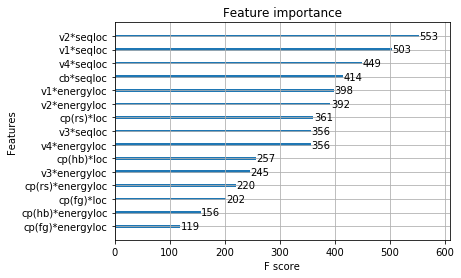

In [43]:
X=dataset.iloc[:,0:15]
Y=dataset.iloc[:,16]

xgb1.fit(X,Y)
plot_importance(xgb1)
pyplot.show()

In [49]:
from sklearn.learning_curve import learning_curve

d:\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
